In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#data["Car_Name"].value_counts()

In [7]:
data["Car_age"]=2021-data["Year"]

In [8]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [9]:
data=data.drop(columns=["Car_Name","Year"])

In [10]:
data=pd.get_dummies(data,columns=["Fuel_Type","Seller_Type","Transmission"])

In [11]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


<AxesSubplot:xlabel='Car_age', ylabel='Selling_Price'>

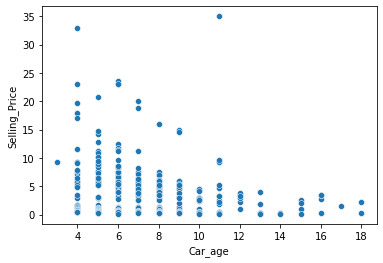

In [12]:
sb.scatterplot(x=data["Car_age"], y=data["Selling_Price"])

In [13]:
x=data.drop(columns="Selling_Price")

y=data["Selling_Price"]

In [14]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,train_test_split

In [15]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((240, 11), (61, 11), (240,), (61,))

In [17]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score

In [18]:
rfr=RandomForestRegressor()
xgr=xgboost.XGBRegressor()

In [19]:
scorer=cross_val_score(rfr,trainx,trainy,cv=10)
scorer.mean()

0.8912411258525603

In [20]:
scorex=cross_val_score(xgr,trainx,trainy,cv=10)
scorex.mean()

0.9017263375771953

# XG BOOST

## XG BOOST without Hypertuning

In [21]:
xgb=xgboost.XGBRegressor()

xgb.fit(trainx,trainy)

yx=xgb.predict(testx)

r2_score(testy,yx)*100

96.12817042386153

## XG BOOST with Hypertuning

In [22]:
xg=xgboost.XGBRegressor()

In [23]:
xg.fit(trainx,trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
[float(i) for i in np.linspace(0,1,3)]

[0.0, 0.5, 1.0]

In [25]:
search={"importance_type": ["string", "default", "gain"],
       "booster":["gbtree", "gblinear","dart"],
       "tree_method":["approx","hist","gpu_hist","auto","exact"]}

In [26]:
bestxg=RandomizedSearchCV(estimator=xgr,param_distributions=search,n_jobs=10,n_iter=1,cv=10,verbose=2,random_state=100)

In [27]:
bestxg.fit(trainx,trainy)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   16.5s remaining:   38.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   25.8s finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_wei

In [28]:
bestxg.best_score_

0.9346755479732011

In [29]:
bestxg.best_params_

{'tree_method': 'hist', 'importance_type': 'default', 'booster': 'gbtree'}

In [30]:
yxt=bestxg.predict(testx)

r2_score(testy,yxt)*100

96.00932922108547

# Random Forest

## Random Forest without HyperTuning

In [31]:
rfr.fit(trainx,trainy)

yf=rfr.predict(testx)

r2_score(testy,yf)*100

96.29524832812226

In [32]:
import pickle

In [35]:
file=open("carmodel.pkl","wb")

pickle.dump(rfr,file)

In [40]:
model=open("carmodel.pkl","rb")

In [41]:
prediction=pickle.load(model)